In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [51]:
forcast_df         = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\forecasts_civ_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate')
metadata_df        = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\metadata_civ_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate')
metadatasummary_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\metadatasummary_civ_arma_(1,0).csv',parse_dates=True)
pnl_df             = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\pnl_armaspreadthreshold_civ_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate')
positions_df       = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\positions_civ_arma_ma50_(1,0).csv',parse_dates=True,index_col='asofdate')
trade_pnl          = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\tradelevelpnl_armaspreadthreshold_civ_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate') 
performance_df     = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\tradeperformance_civ_arma_ma50_(1,0).csv',parse_dates=True)

In [52]:
metadatasummary_df

,Unnamed: 0,0
0,Unnamed: 0,149.500000
1,aic,-659.235583
2,bic,-648.647296
3,hqic,-654.975076
4,mae,0.042739
5,mse,0.004418
6,forecastHorizon,5.000000
7,diff,1.000000
8,trainDFLength,252.000000
9,num_models,1500.000000


In [53]:
performance_df

,Unnamed: 0


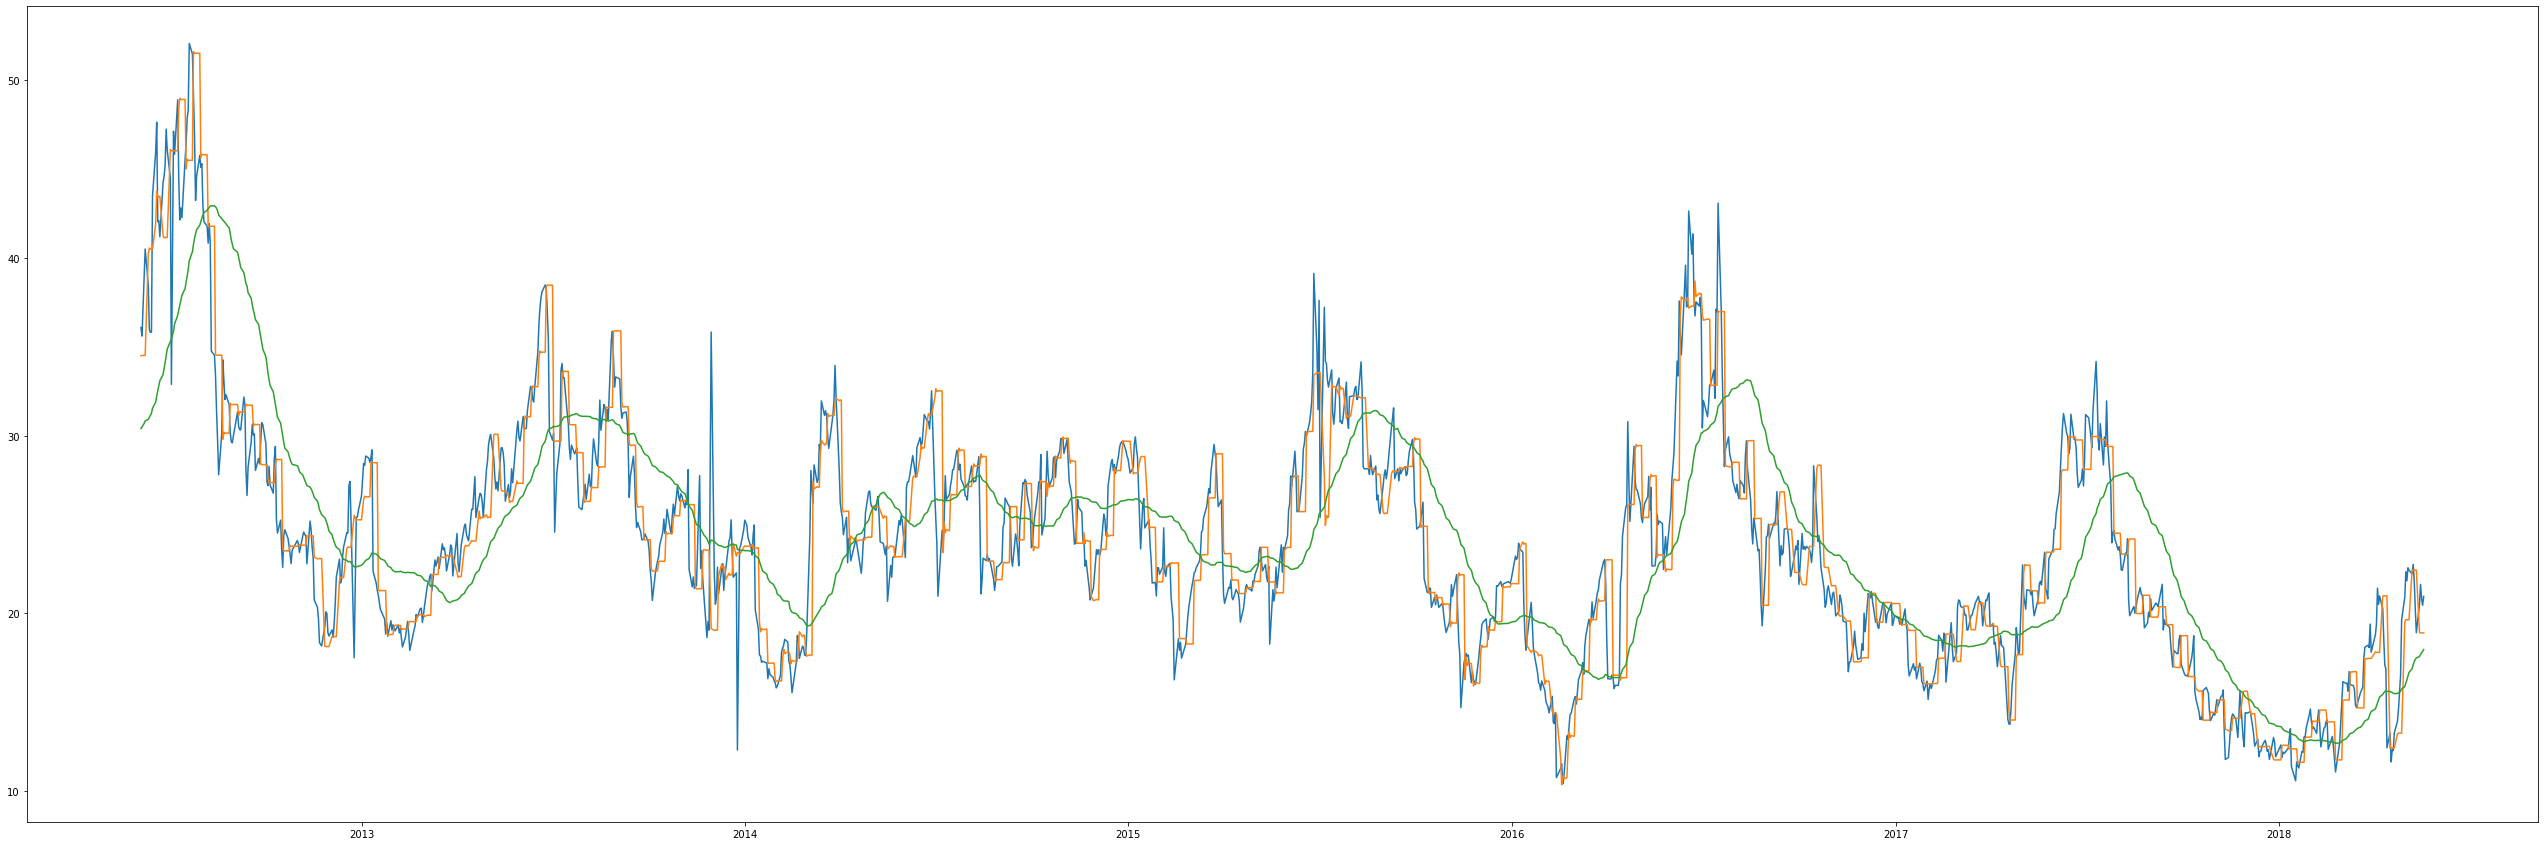

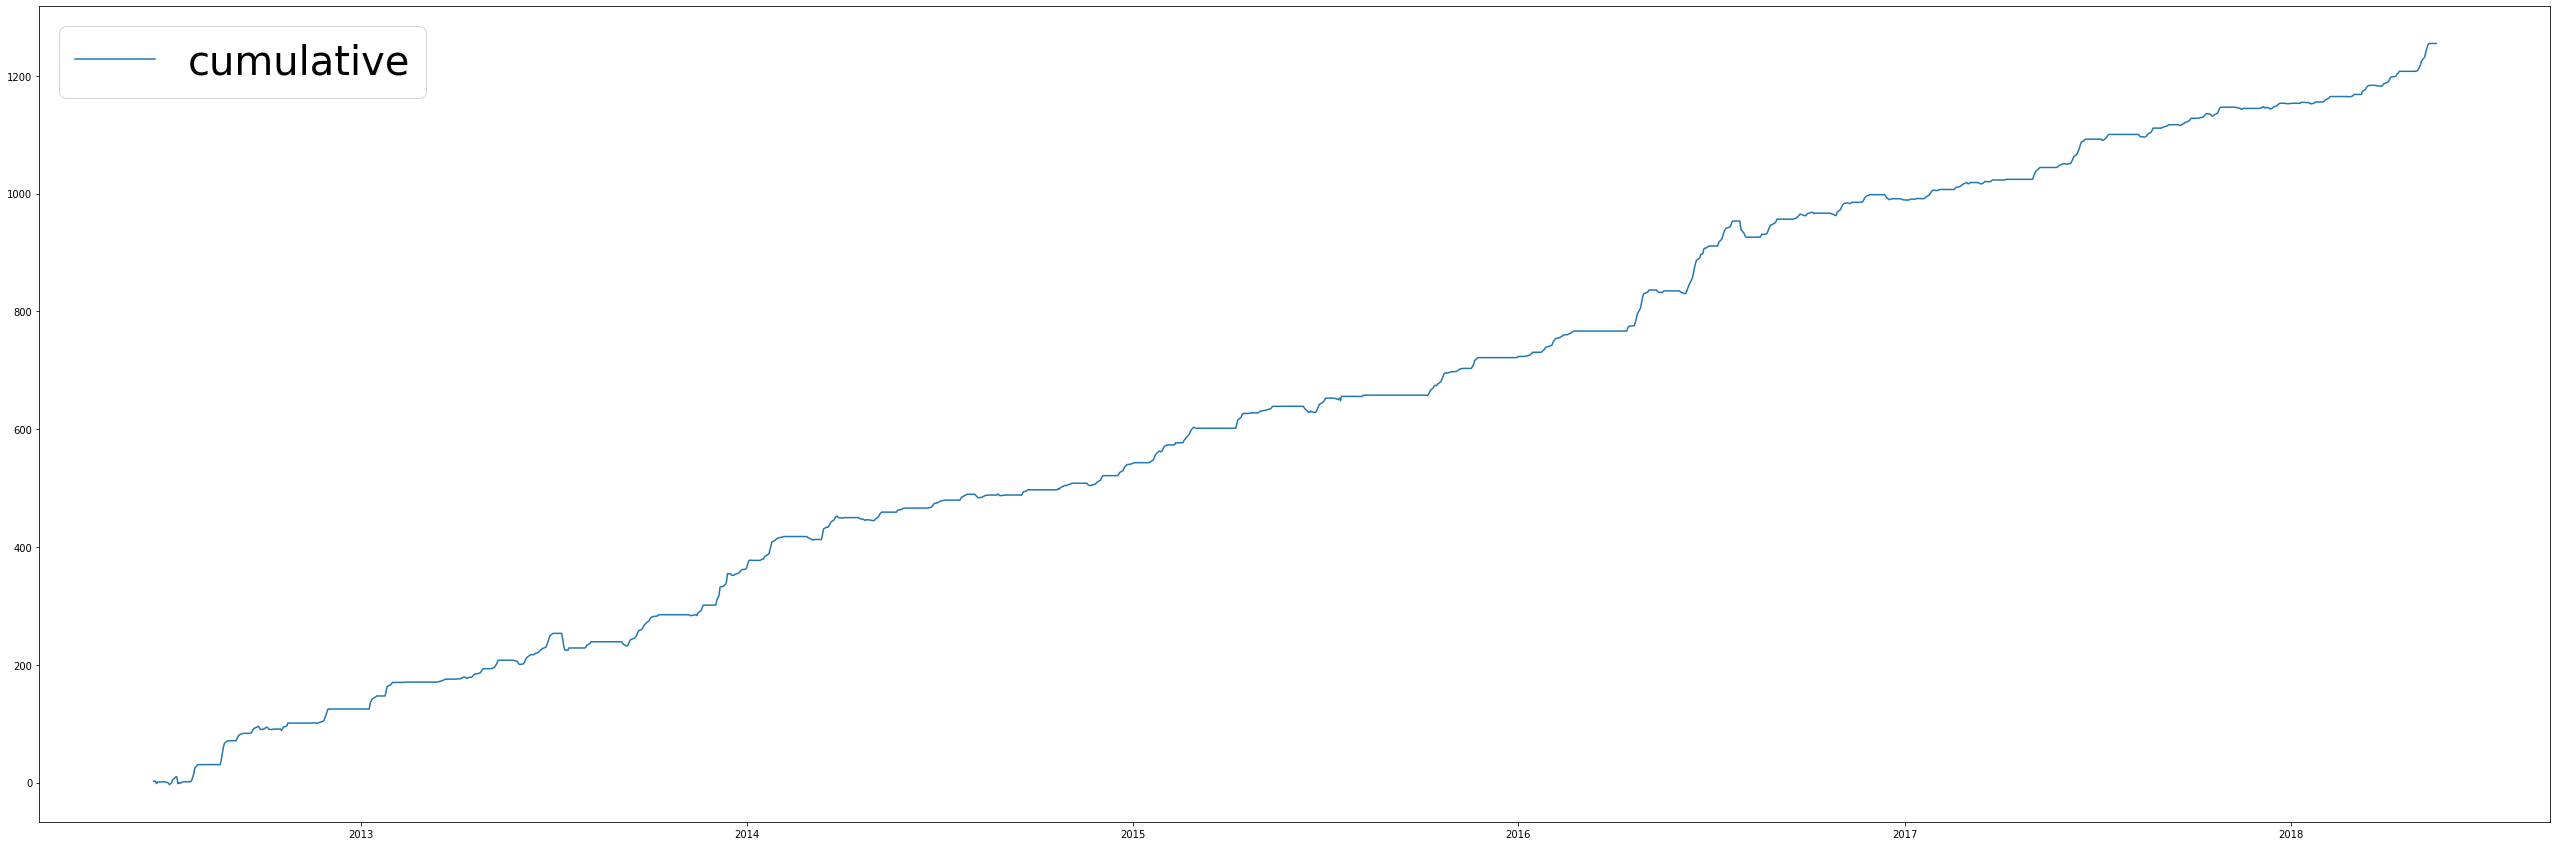

In [54]:
plt.figure(figsize=(45,15))

plt.plot(forcast_df['close'])
plt.plot(forcast_df['pointForecast'])
plt.plot(forcast_df['MA_50'])

plt.show()

plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'].cumsum())

plt.legend(['cumulative'],fontsize=40)

plt.show()


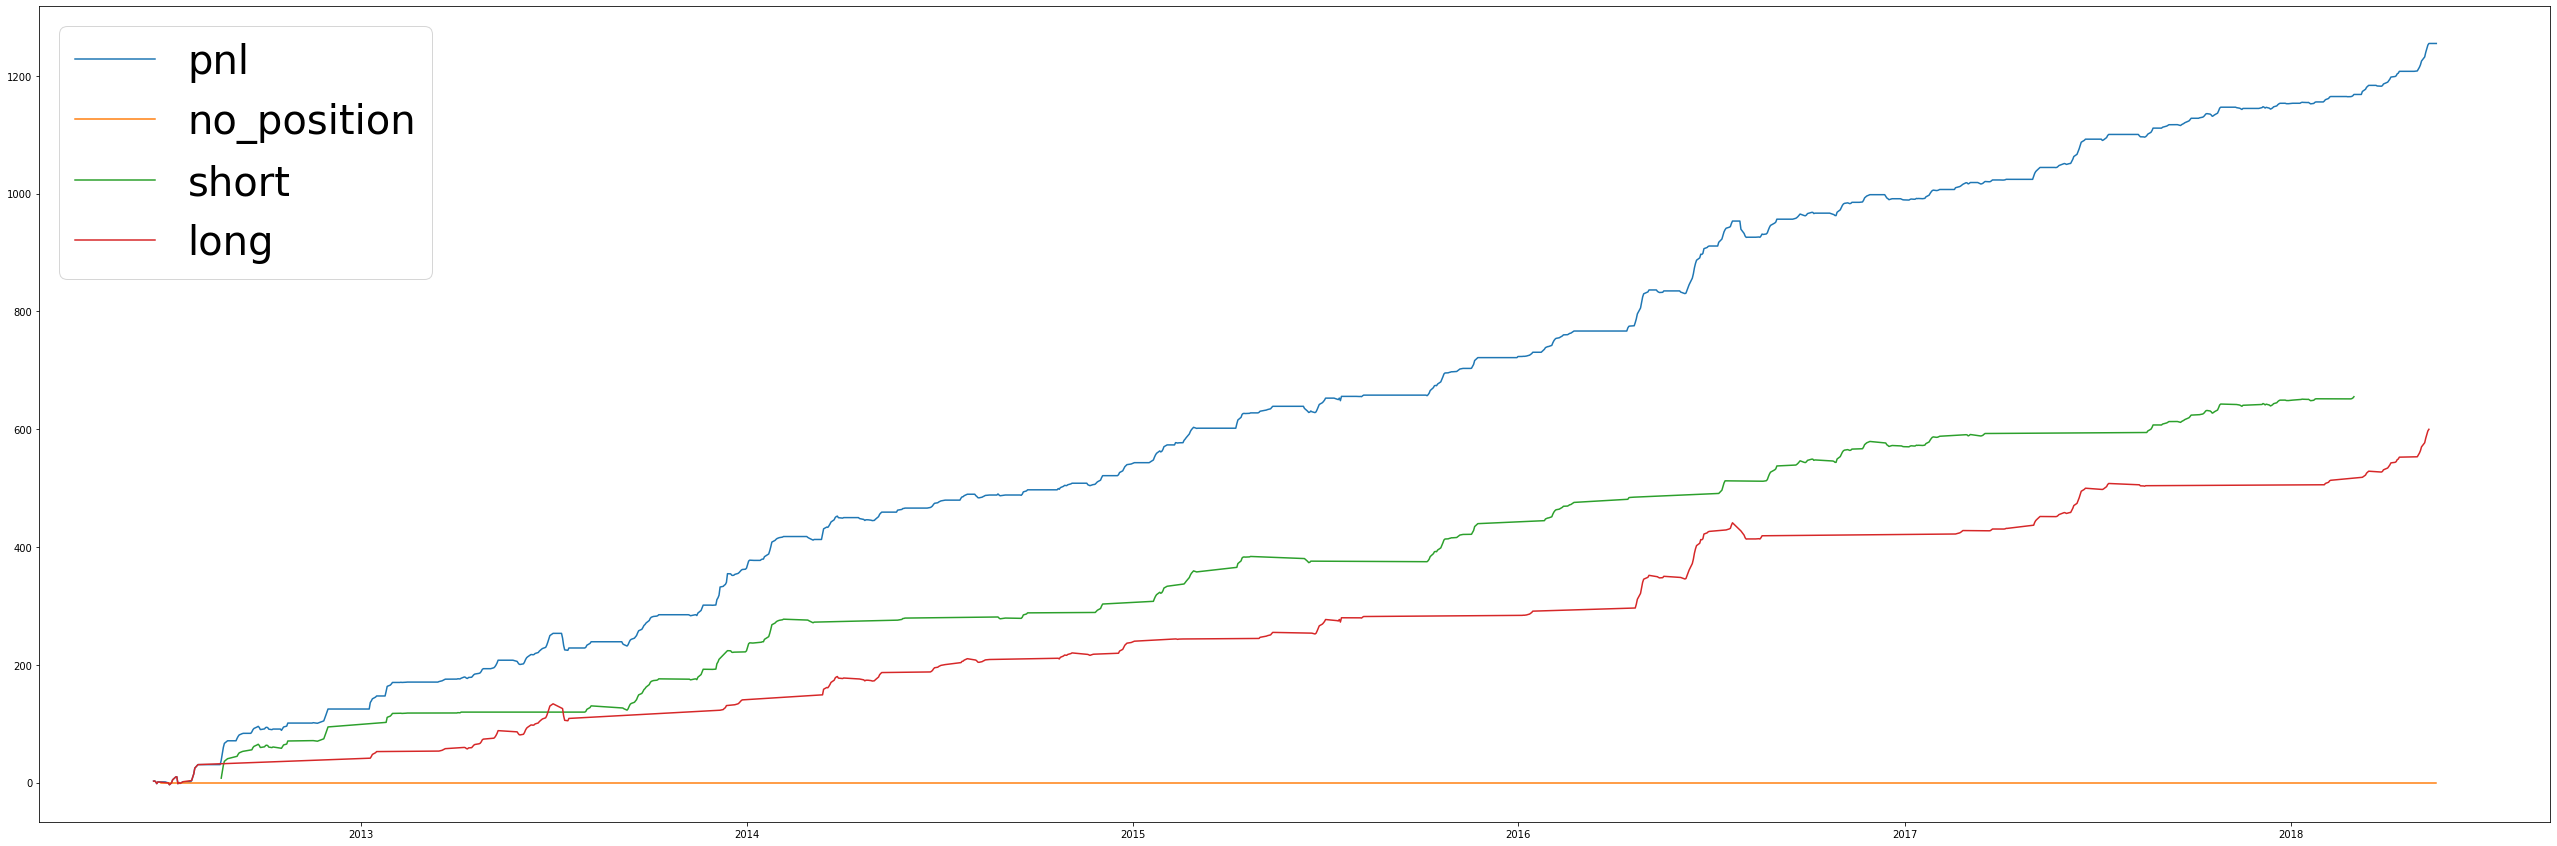

In [55]:
plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'].cumsum())

plt.plot(pnl_df[pnl_df['positionType'] == 'no_position']['pnl'].cumsum())
plt.plot(pnl_df[pnl_df['positionType'] == 'short']['pnl'].cumsum())
plt.plot(pnl_df[pnl_df['positionType'] == 'long']['pnl'].cumsum())

plt.legend(['pnl','no_position','short','long'],fontsize=40)

plt.show()


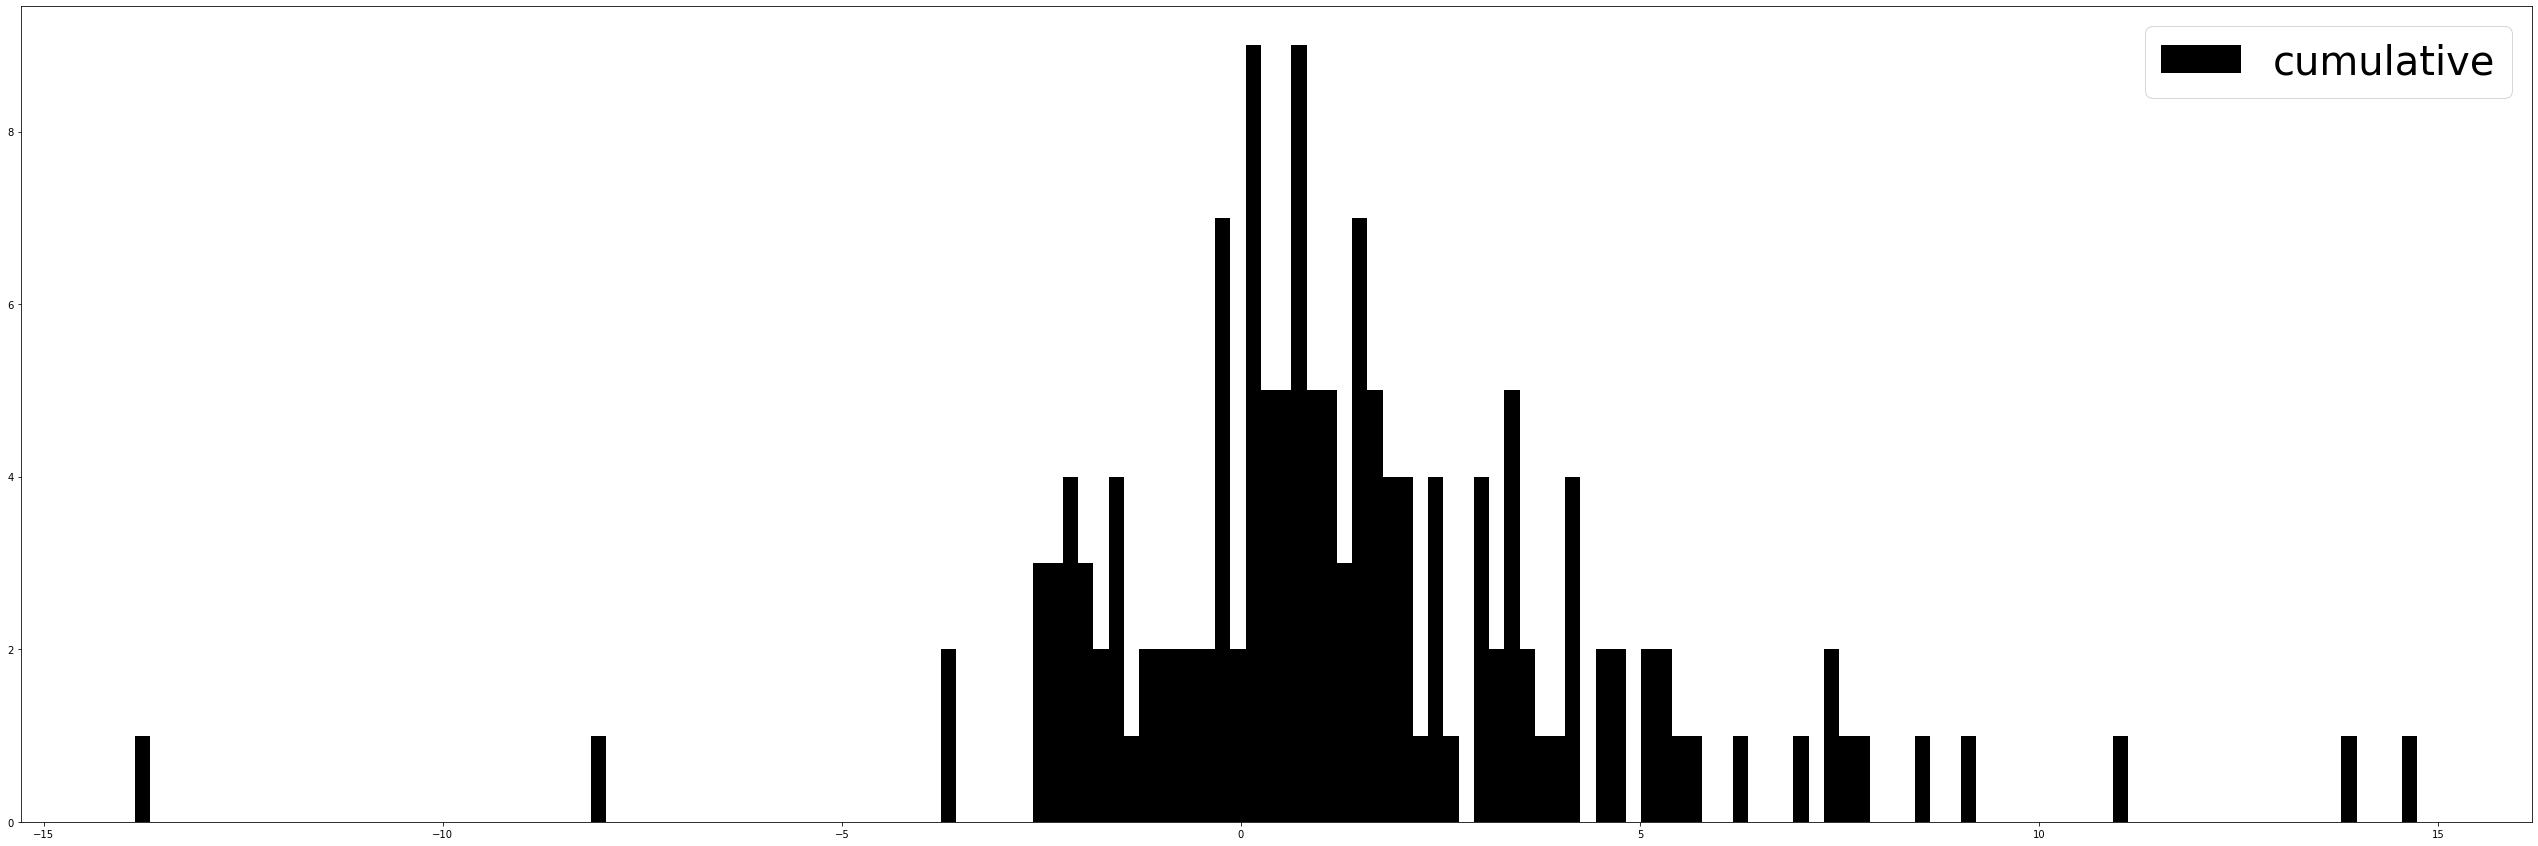

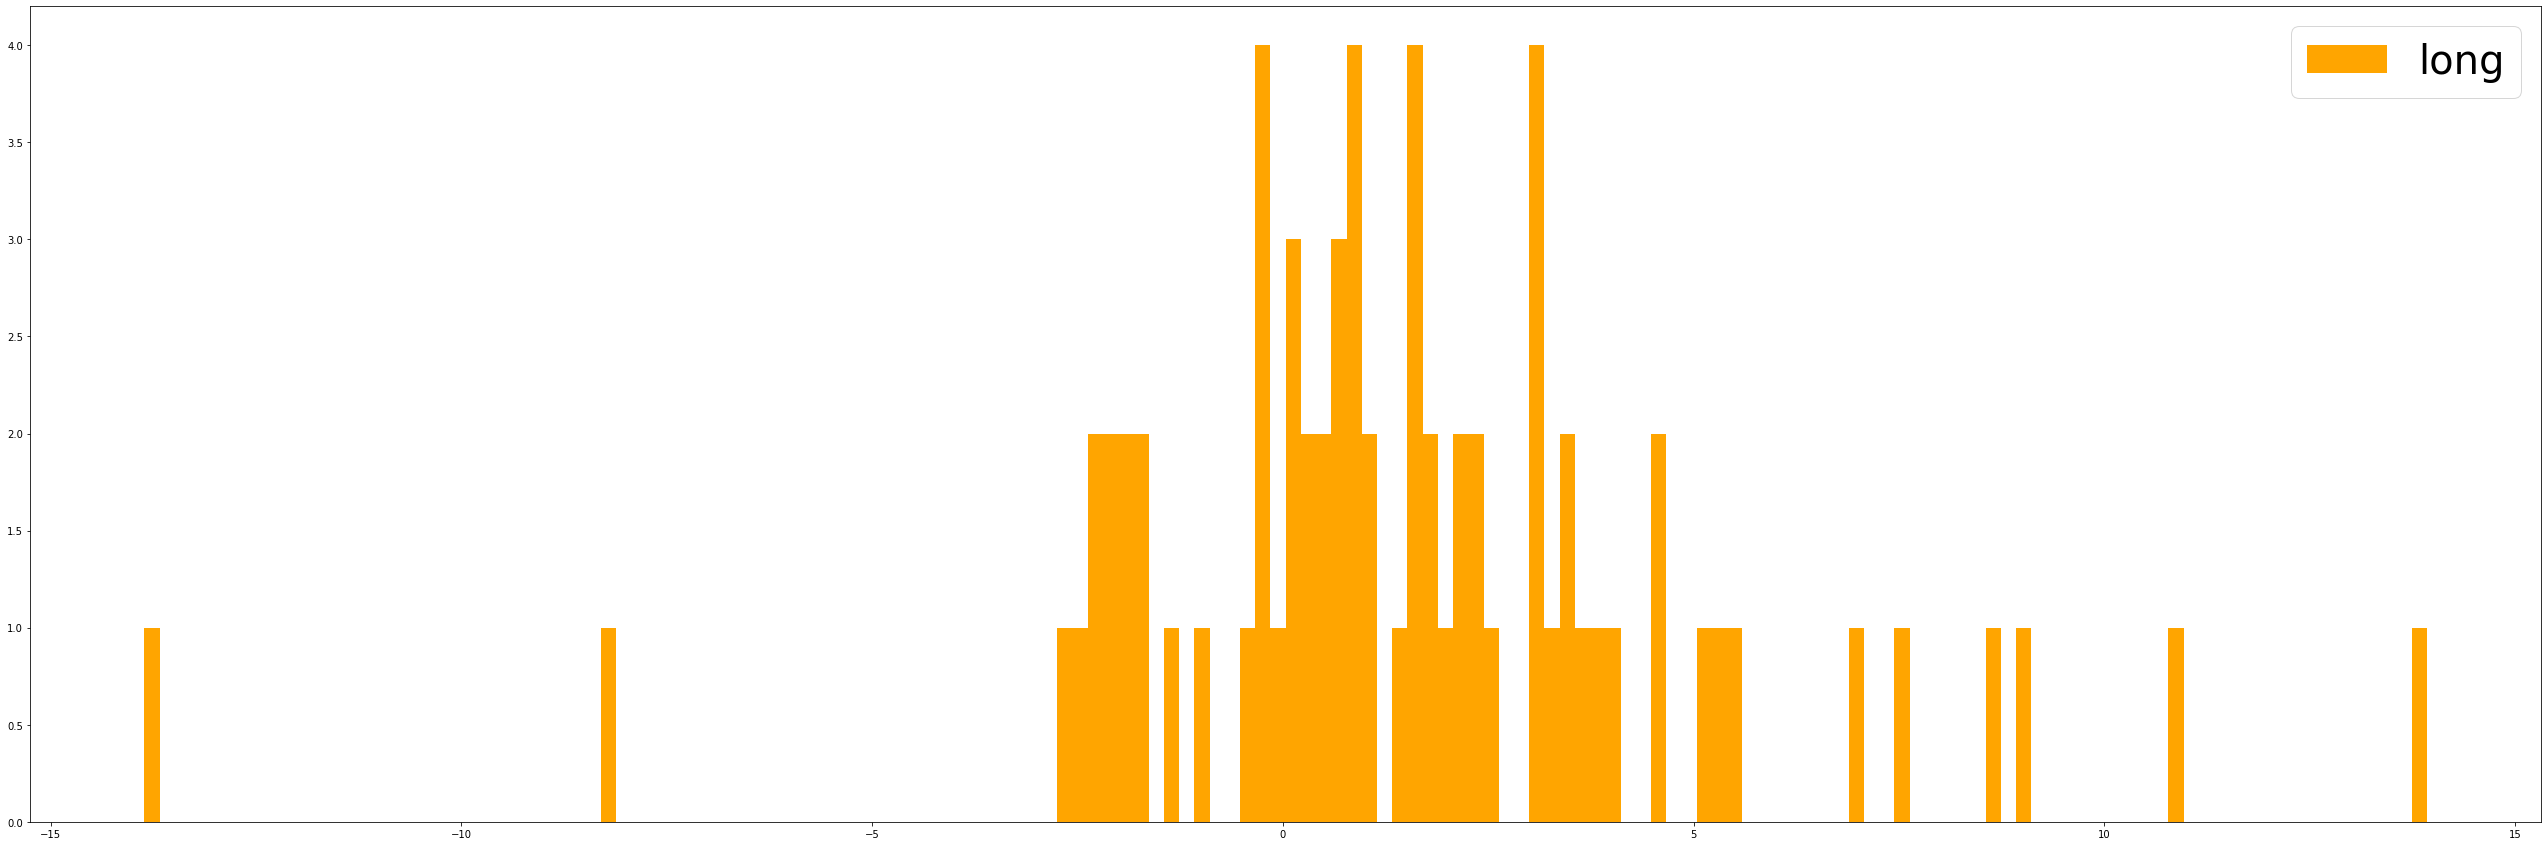

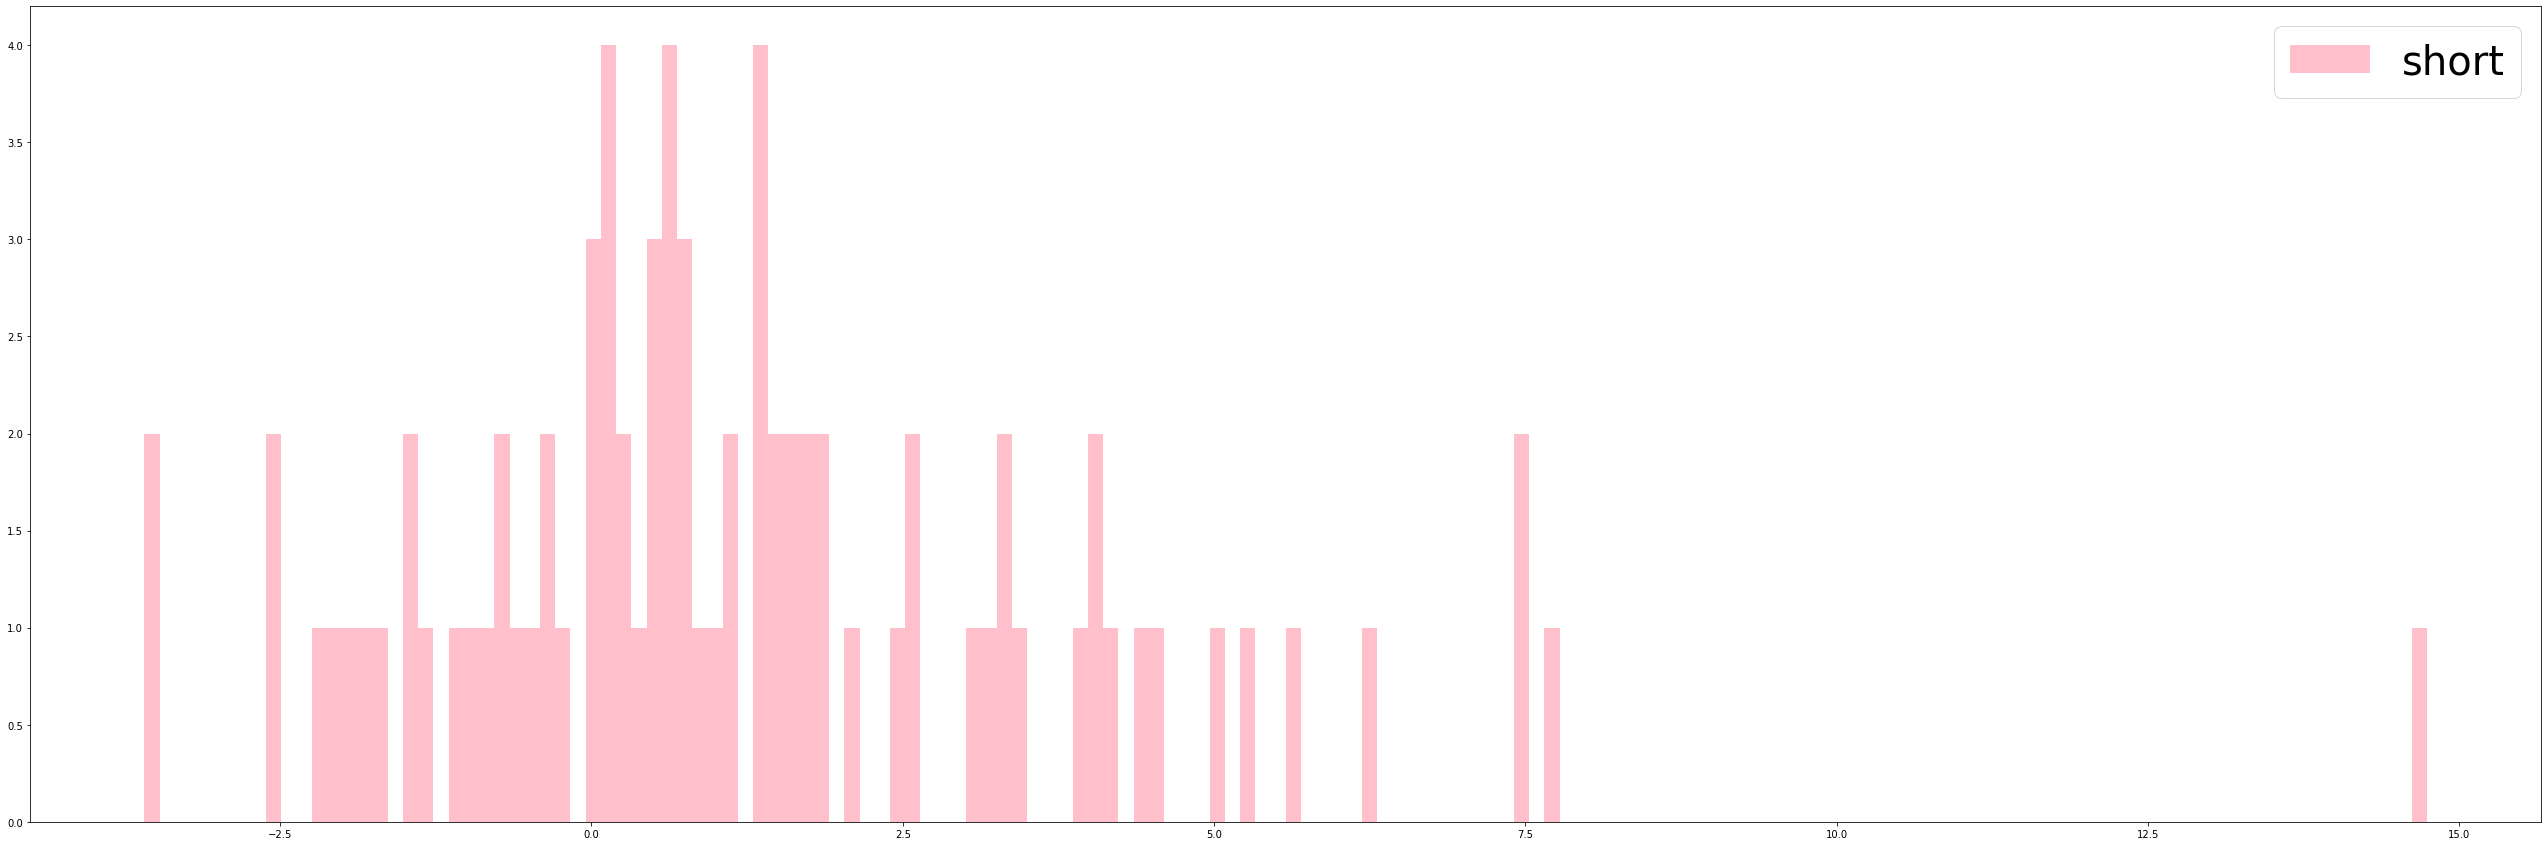

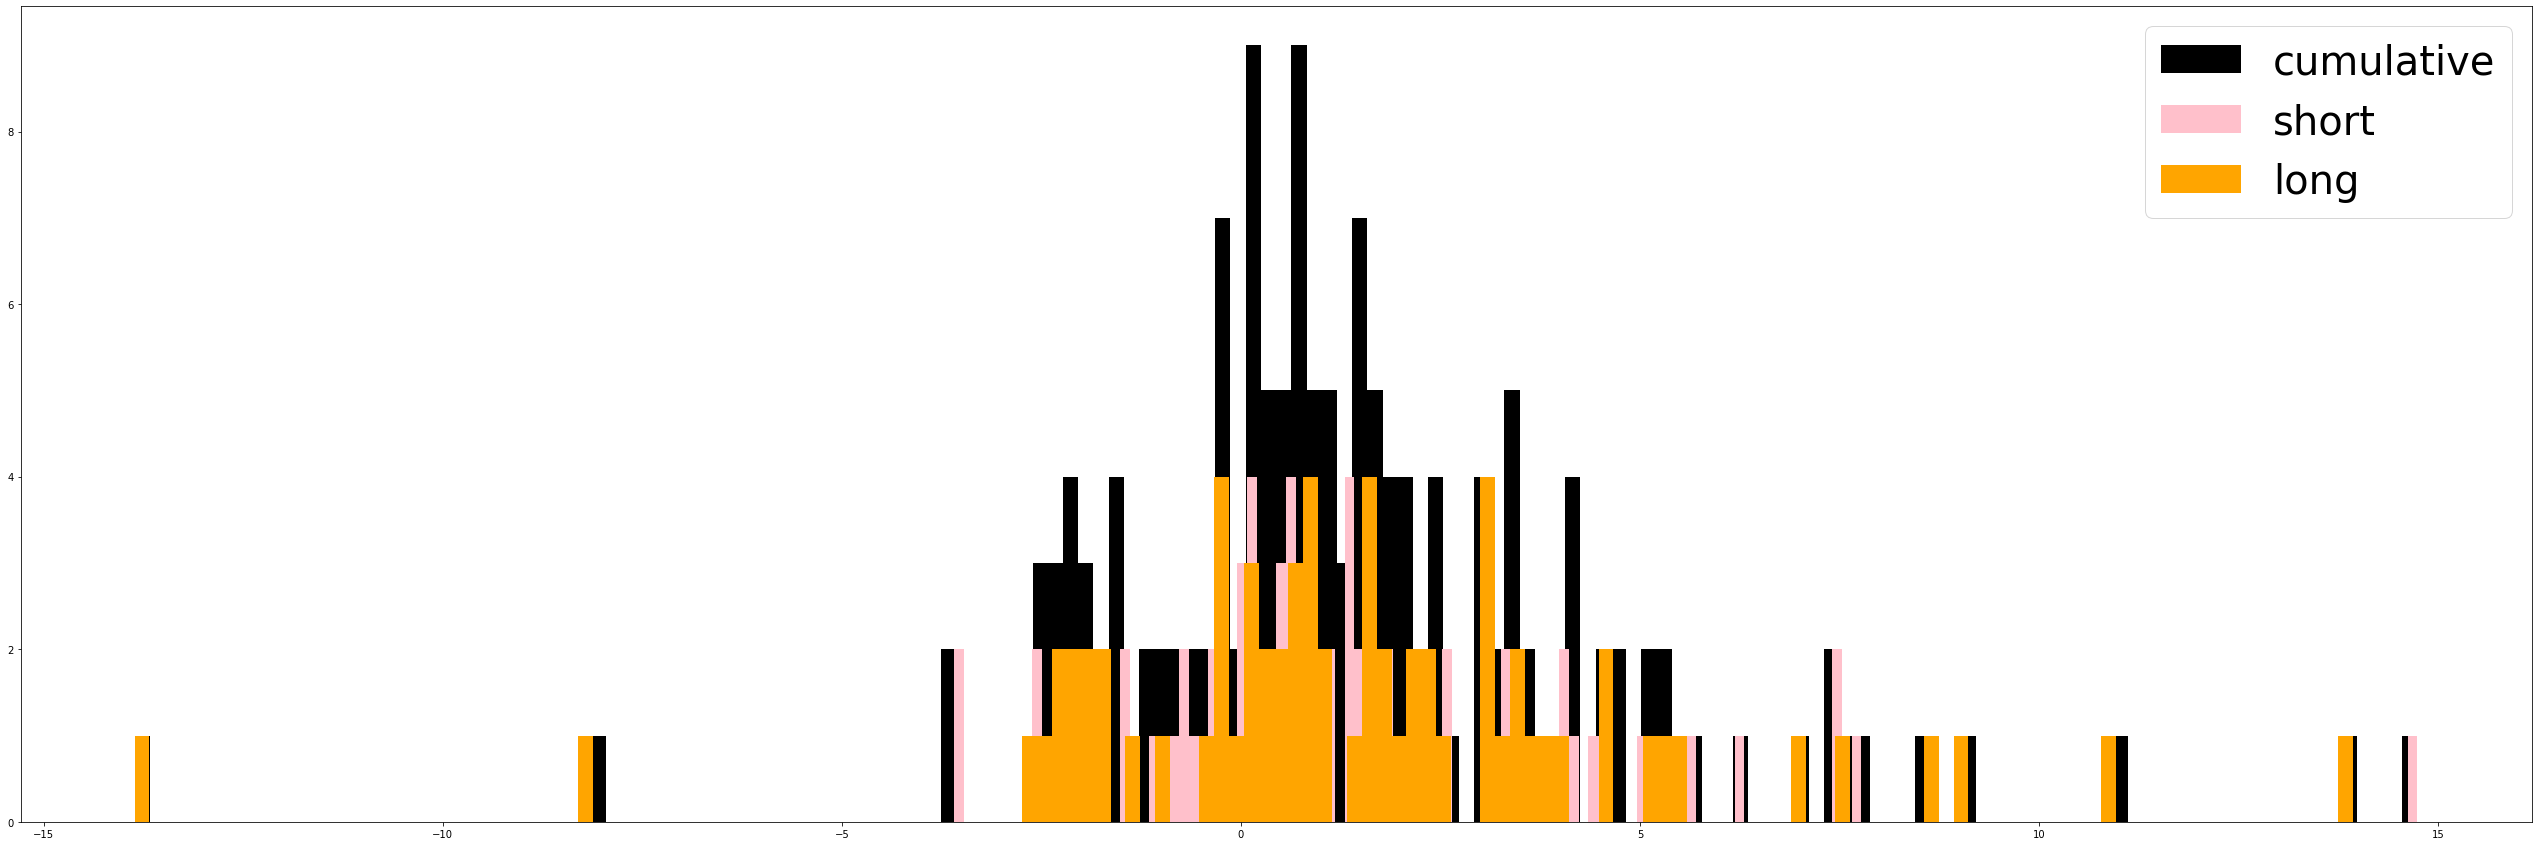

In [56]:
# Cumulative
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['pnl'] != 0]['pnl'],color='black',bins=150)

plt.legend(['cumulative'],fontsize=40)

plt.show()

# Short
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'],color='orange',bins=150)

plt.legend(['long'],fontsize=40)

plt.show()

# Long
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'],color='pink',bins=150)

plt.legend(['short'],fontsize=40)

plt.show()

# Compare all
plt.figure(figsize=(45,15))
plt.hist(trade_pnl[trade_pnl['pnl'] != 0]['pnl'],color='black',bins=150)

plt.hist(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'],color='pink',bins=150)
plt.hist(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'],color='orange',bins=150)

plt.legend(['cumulative','short','long'],fontsize=40)

plt.show()

# Pnl vs. Price

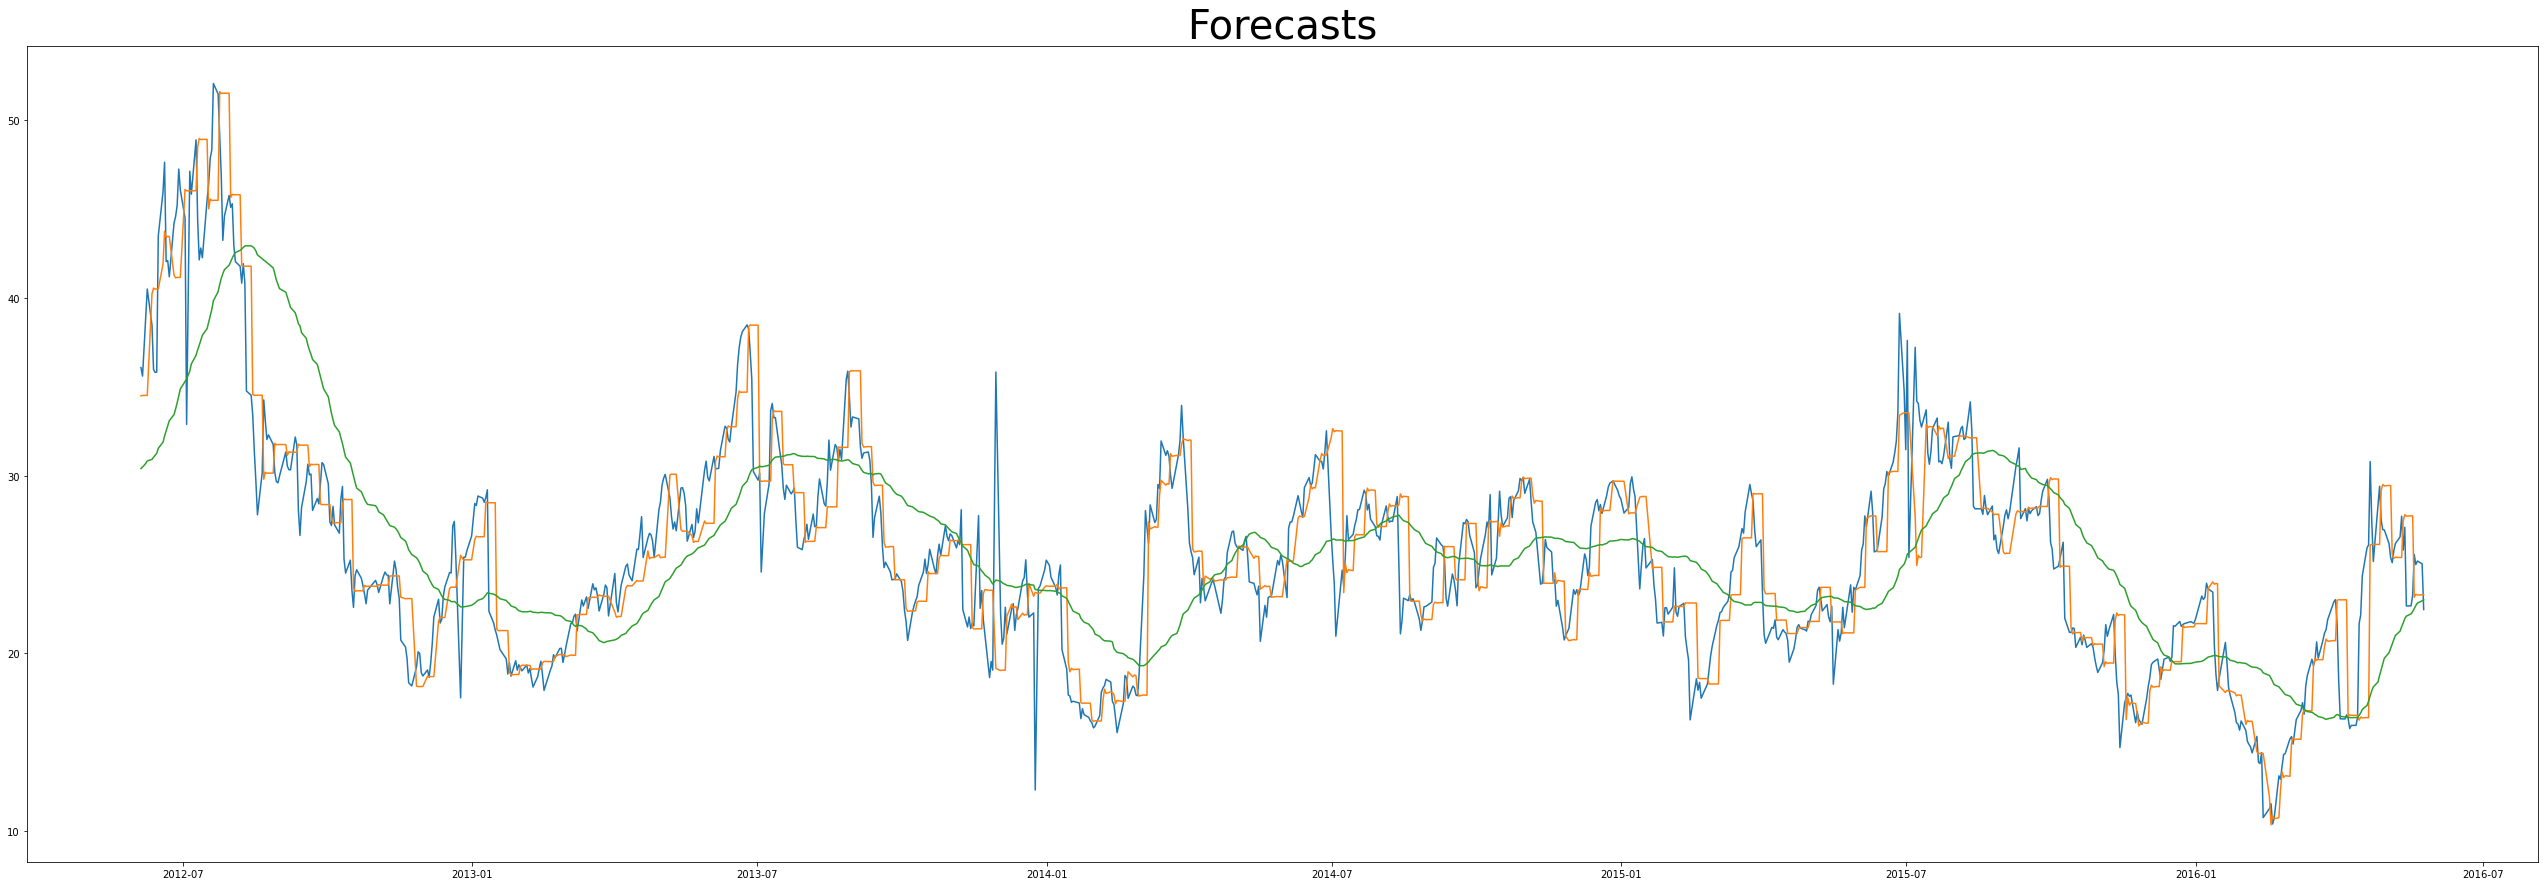

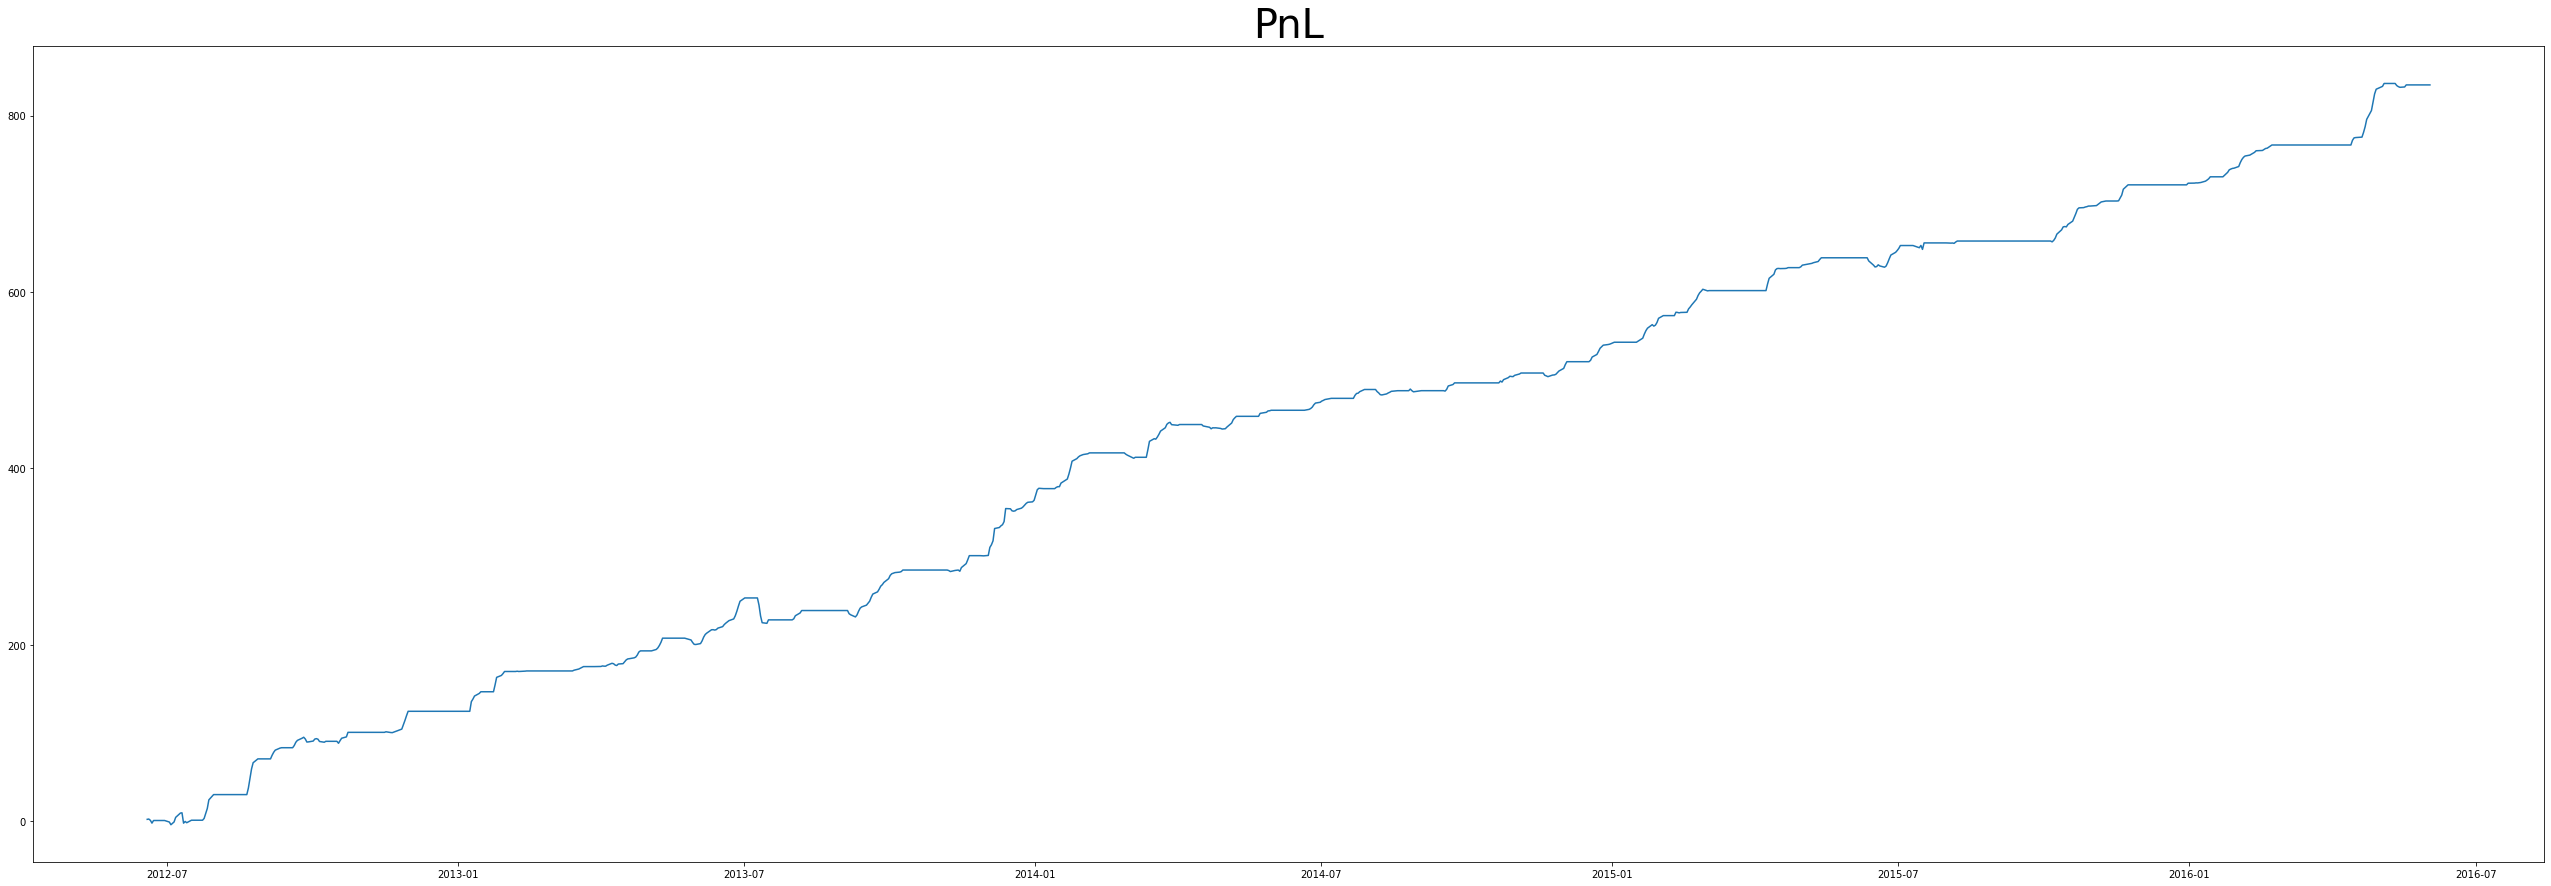

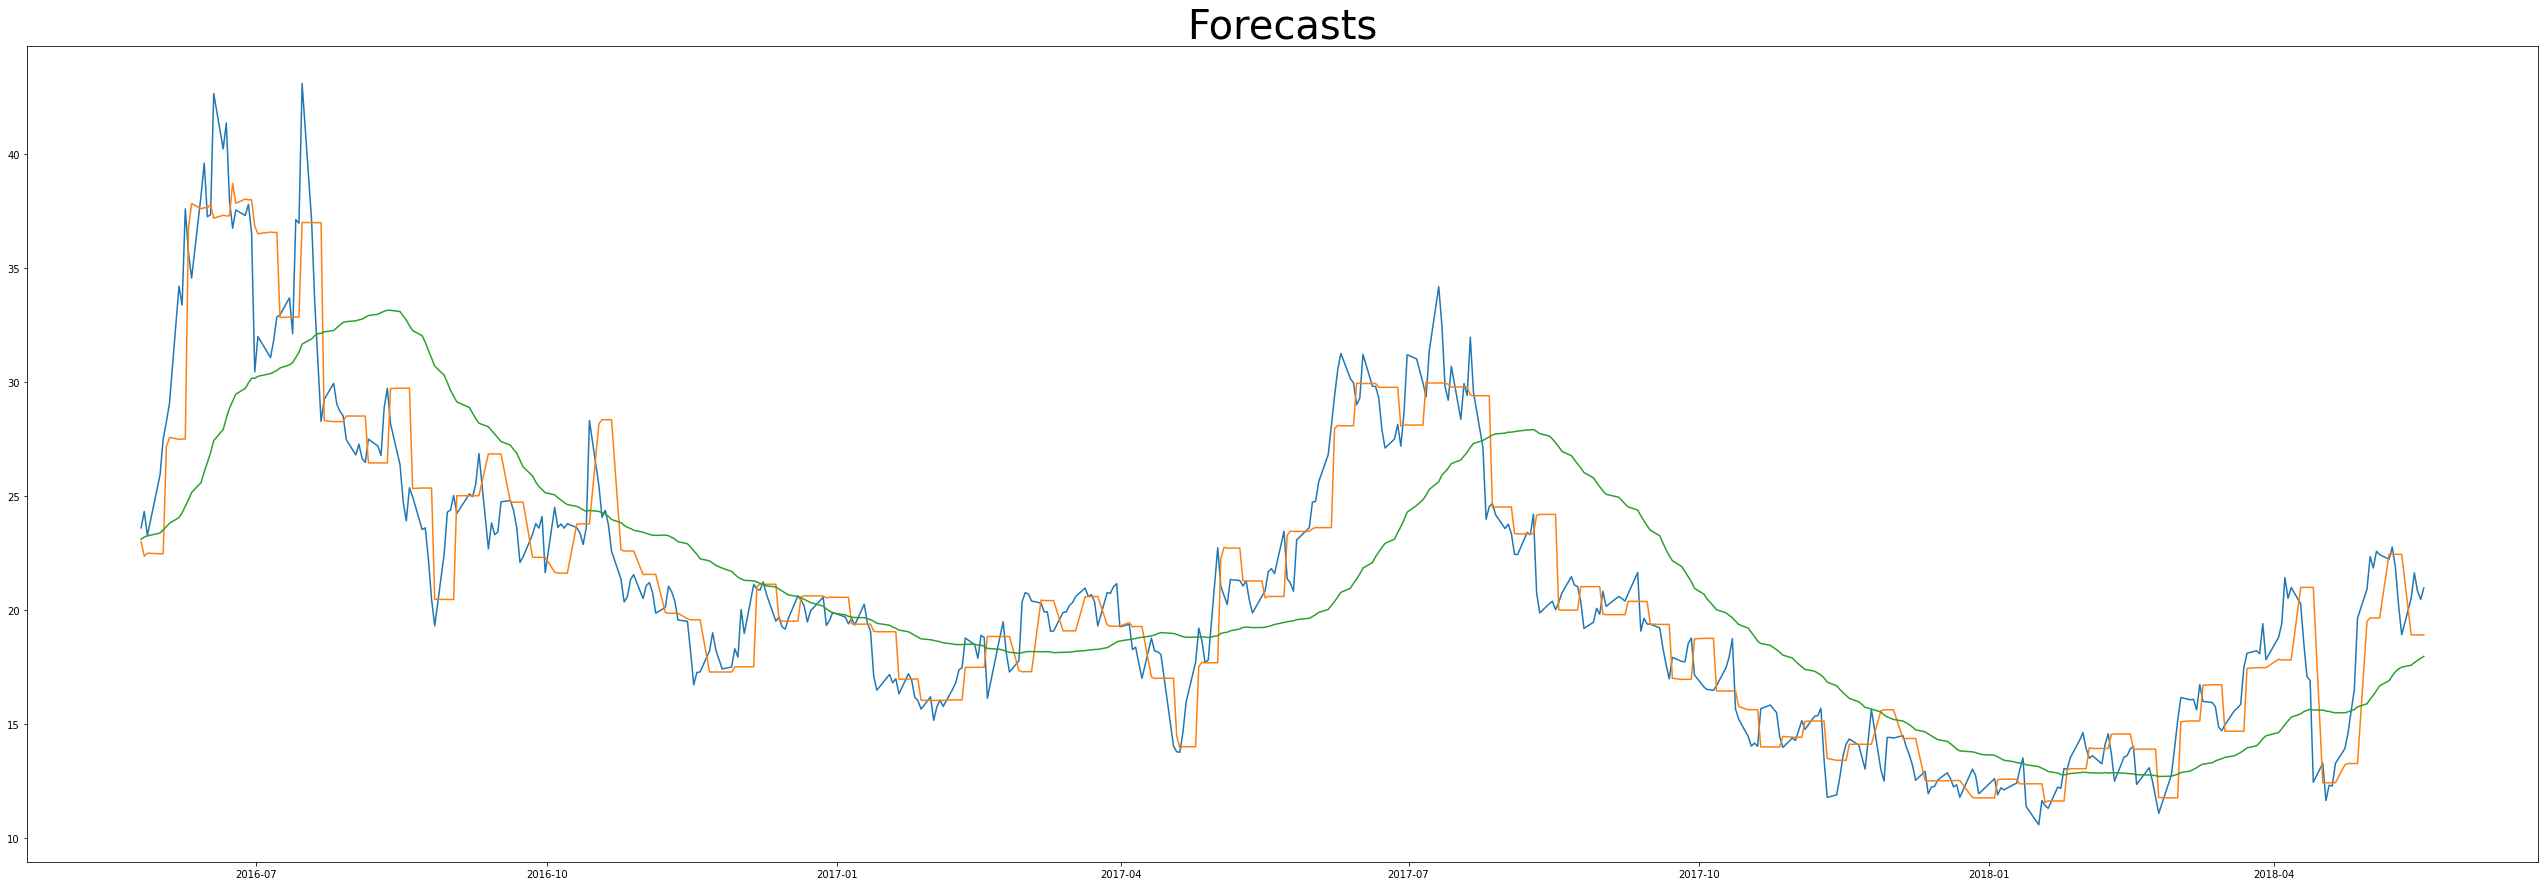

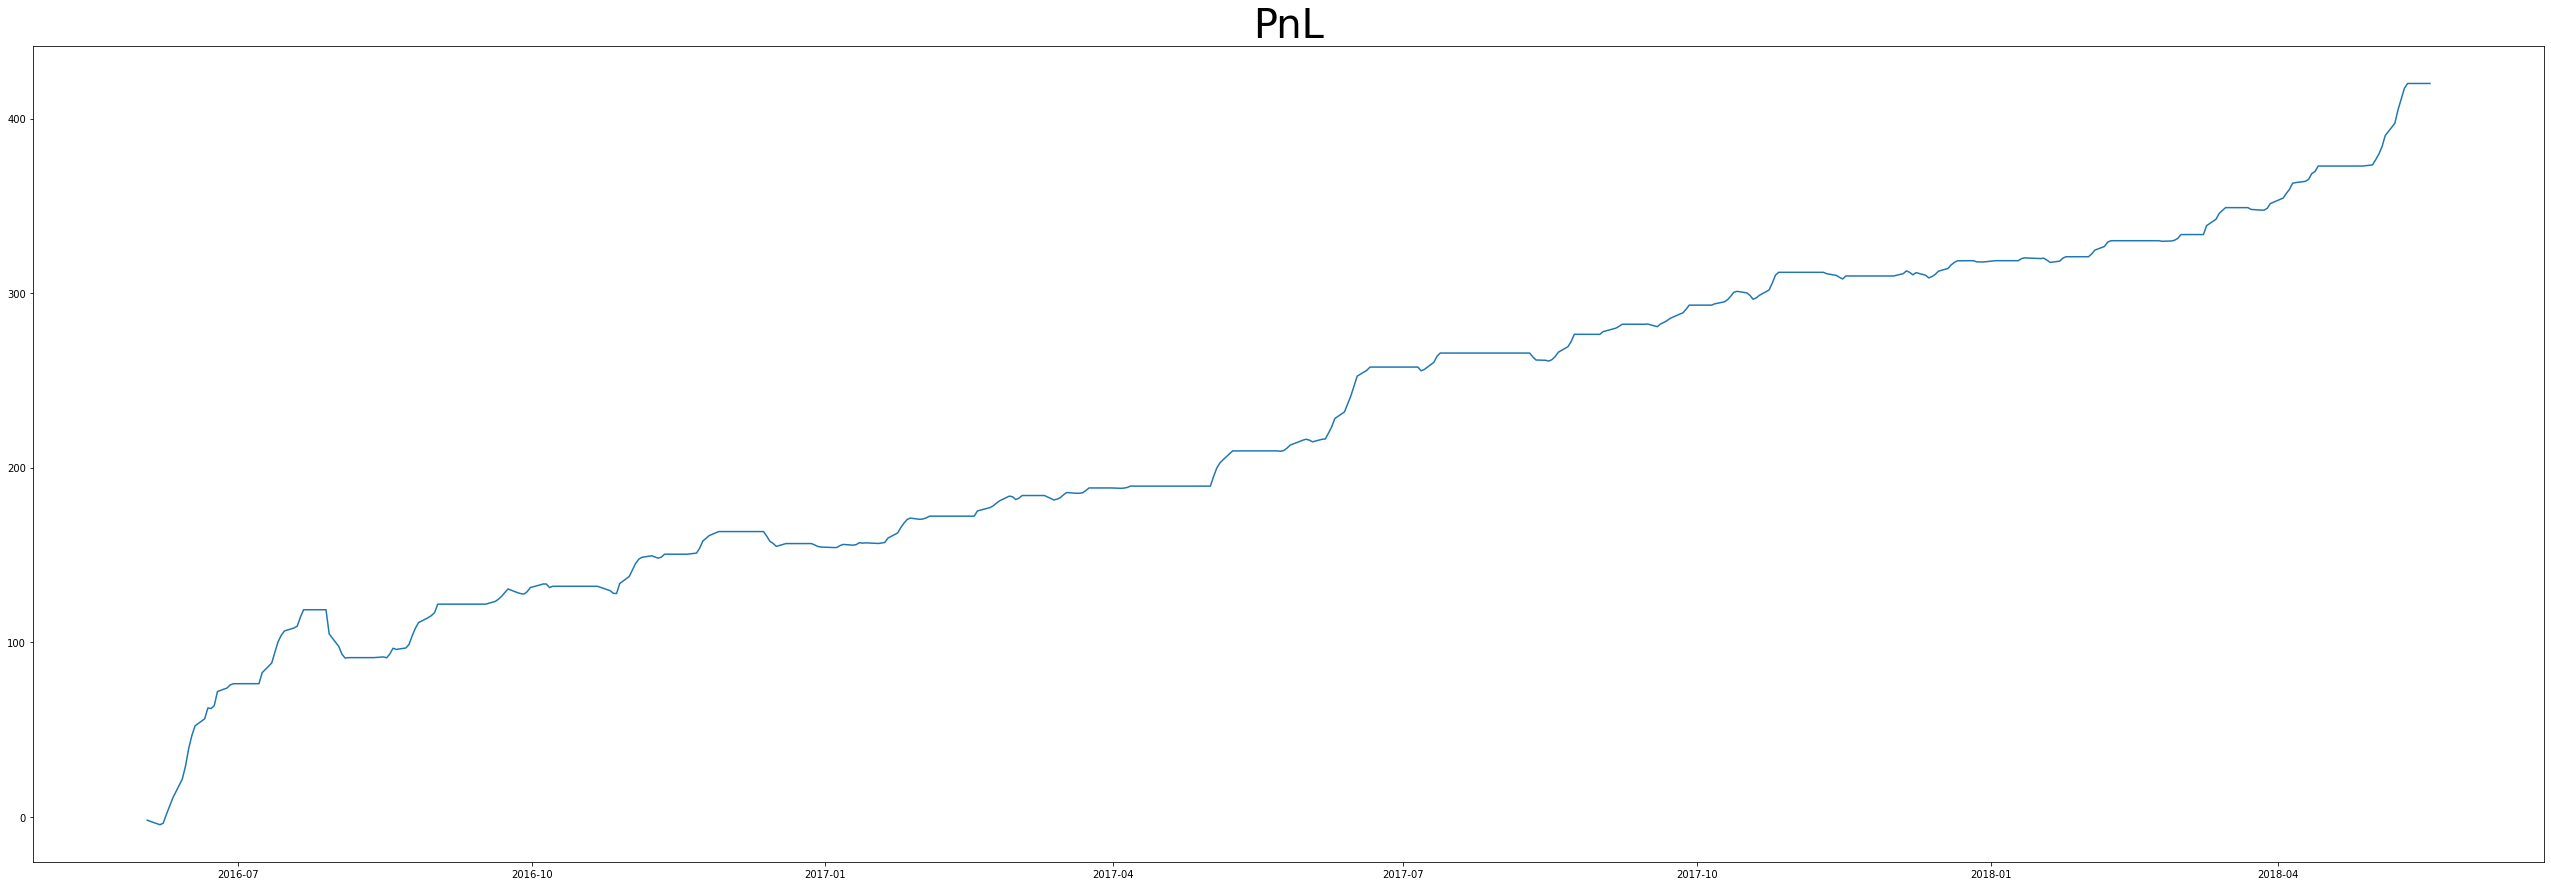

In [67]:
for i in range(2):
    plt.figure(figsize=(45,15))

    plt.plot(forcast_df['close'][i*1000:(i+1)*1000])
    plt.plot(forcast_df['pointForecast'][i*1000:(i+1)*1000])
    plt.title('Forecasts',fontsize=40)
    plt.plot(forcast_df['MA_50'][i*1000:(i+1)*1000])

    plt.show()

    plt.figure(figsize=(45,15))

    plt.plot(pnl_df['pnl'][i*1000:(i+1)*1000].cumsum())
    plt.title('PnL',fontsize=40)
    plt.show()

# Metadata analysis

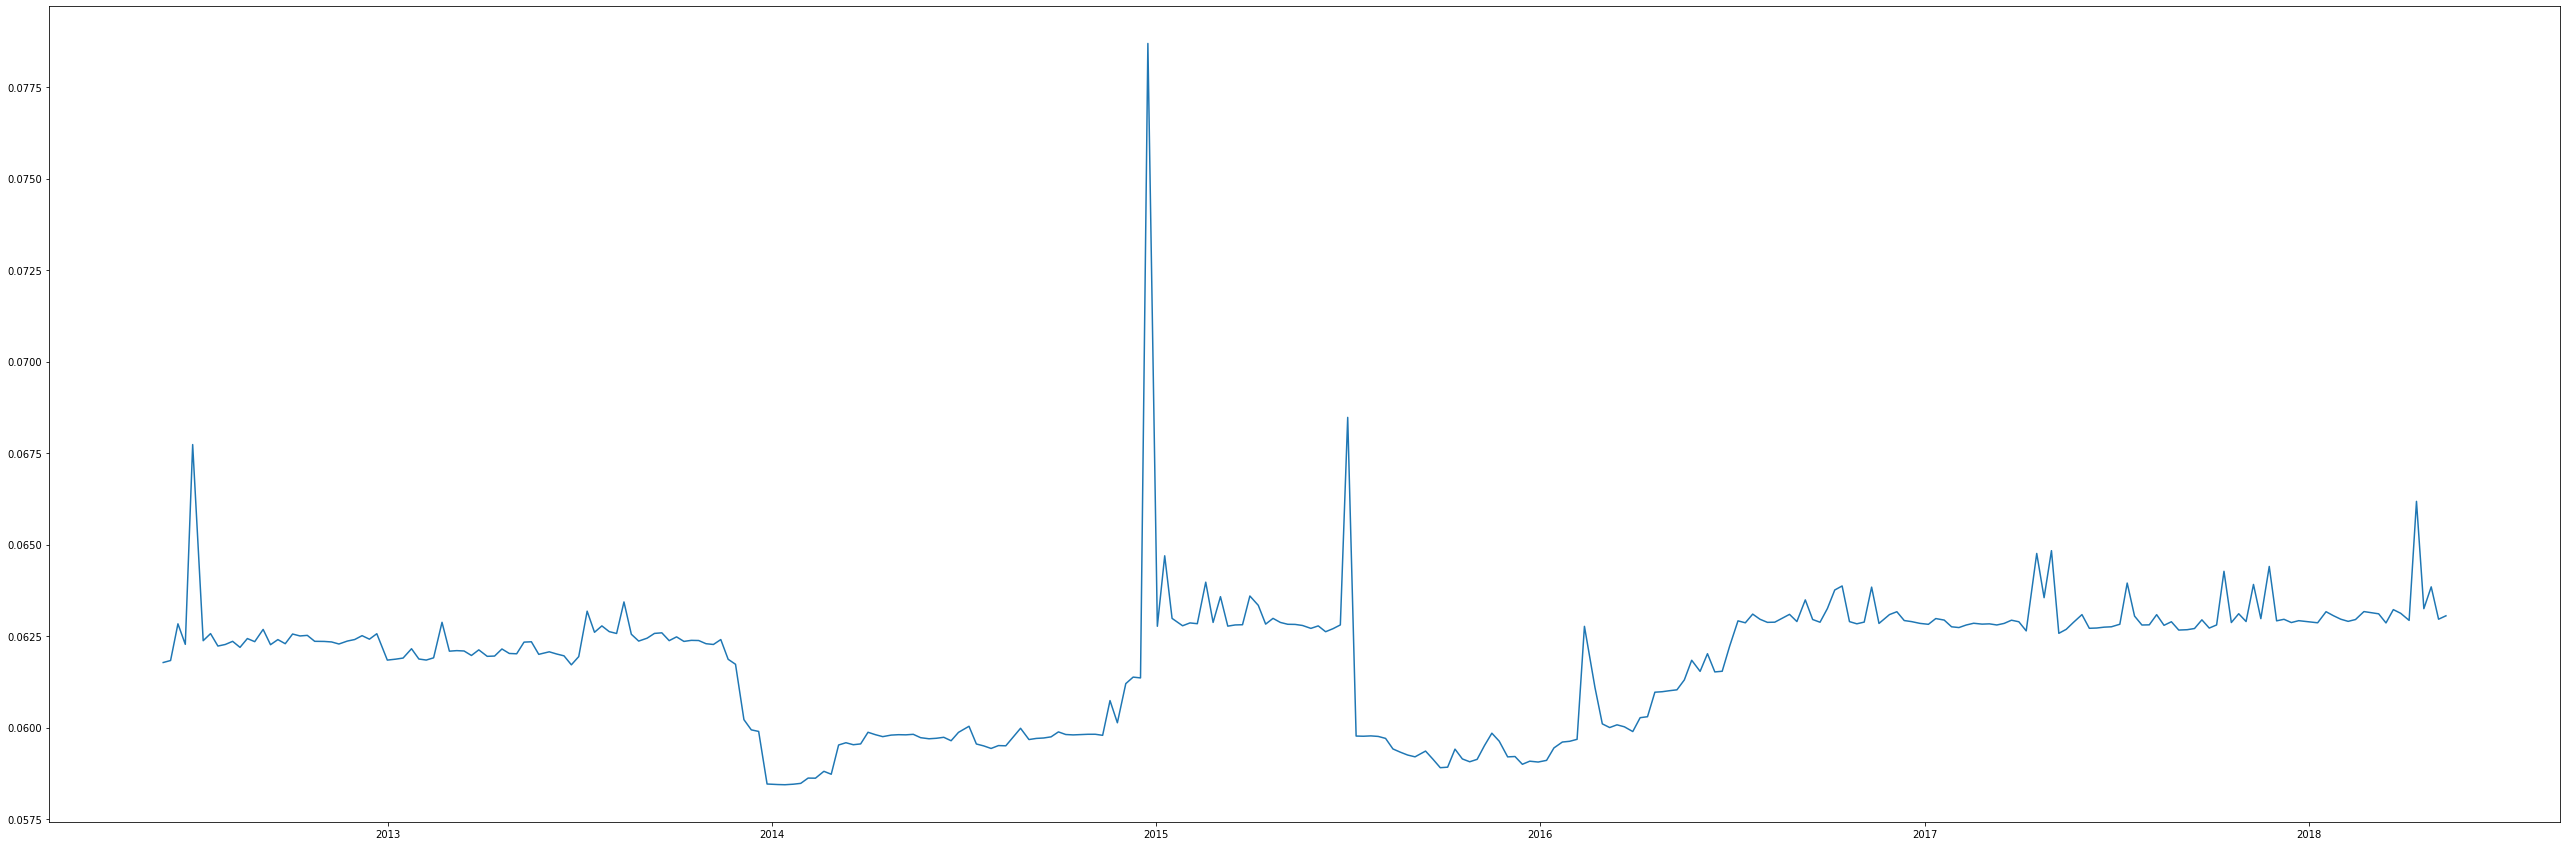

In [65]:
plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.plot(metadata_df[f'ar.L{i}.close'])

# plt.legend(['ar.L1.close','ar.L1.close'],fontsize=40)

plt.show()

# plt.figure(figsize=(45,15))

# for i in range(1,2):
#     plt.plot(metadata_df[f'ma.L{i}.close'])
    
# plt.show()

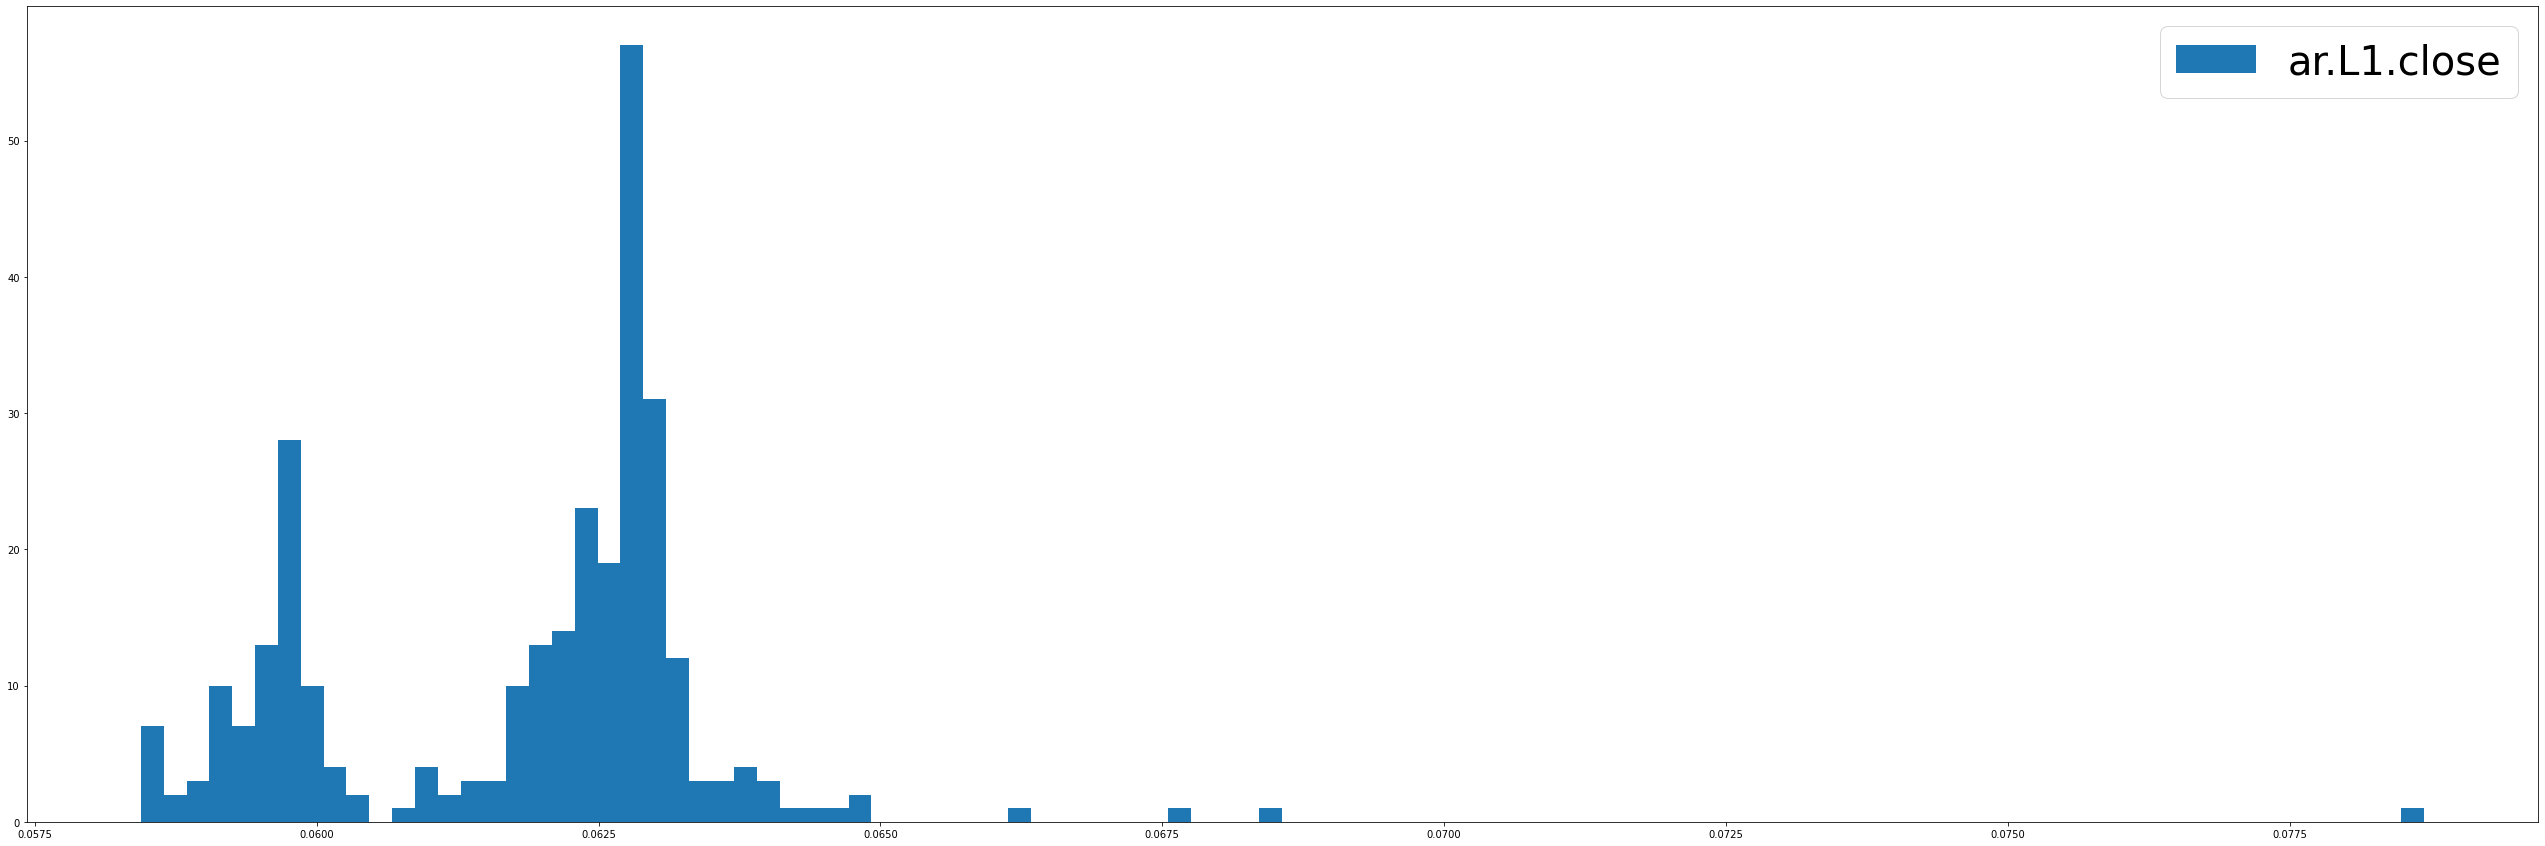

<Figure size 3240x1080 with 0 Axes>

<Figure size 3240x1080 with 0 Axes>

In [66]:
plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.hist(metadata_df[f'ar.L{i}.close'],bins=100)

plt.legend(['ar.L1.close','ar.L1.close'],fontsize=40)

plt.show()

plt.figure(figsize=(45,15))

# for i in range(1,2):
#     plt.hist(metadata_df[f'ma.L{i}.close'],bins=100)
    
# plt.legend(['ma.L1.close','ma.L1.close'],fontsize=40)

# plt.show()